<a href="https://colab.research.google.com/github/johnjdailey/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/John_Dailey_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
# Perform K-Means Clustering on the Dataset

# make lists of categorical and numeric columns
cat_cols = df.columns[df.dtypes=='object']
num_cols = df.columns[df.dtypes!='object']

In [0]:
# What are the cat columns?
cat_cols

Index([], dtype='object')

In [0]:
# how many do we have of each?
print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

0 categorical columns
32 numerical columns


In [0]:
df.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [0]:
df.drop(['Unnamed: 32'], axis=1, inplace=True)

In [0]:
# Make a copy of our dataframe, so as to not overwrite our original data
df_copy = df.copy()

In [0]:
# K-MEANS CLUSTERING

# Instantiate the sklearn class, and pick a number of clusters.
kmeans = KMeans(n_clusters=3)
# fit the instantiate model to our data.
kmeans.fit(df_copy)
# the labels are the same as the 3 centers.
labels = kmeans.labels_
print(labels)

[0 0 2 2 2 0 0 2 0 2 0 2 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 2 0 0
 0 0 0 2 2 2 2 0 0 2 2 2 0 2 2 0 0 2 2 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0
 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 0 

In [0]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)
df_copy['clusters'] = new_series.values
df_copy.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2


In [0]:
features = ['texture_mean', 'area_mean']

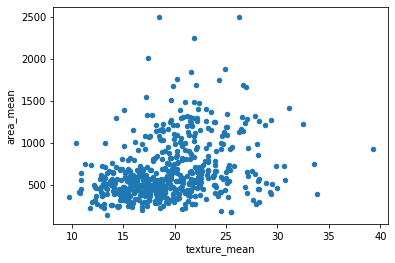

In [0]:
df_copy[features].plot(kind='scatter', x=features[0], y=features[1]);

In [0]:
# Initialize an instance of the KMeans class from sklearn.
k = 3
model = KMeans(n_clusters=k, max_iter=1)

In [0]:
# Fit the instantiated model to our sliced dataframe
model.fit(df_copy[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Assign clusters back to our dataframe
df_copy['cluster'] = model.labels_

In [0]:
# Get our centroids
centroids    =  model.cluster_centers_

In [0]:
# turn them into a dataframe
cc  =  pd.DataFrame(centroids)
cc.head()

,0,1
0,18.295937,439.581556
1,22.136190,1335.166667
2,20.055652,782.196377


In [0]:
# Setup some colors for plotting
base_colors  =  ['r', 'g', 'b']
colors       =  [base_colors[centroid] for centroid in model.labels_]

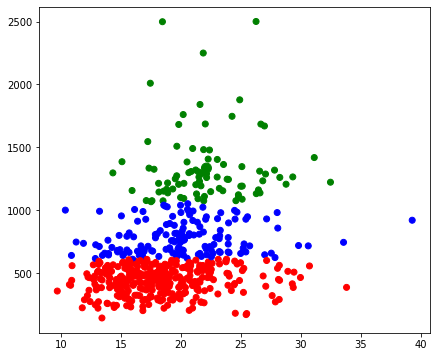

In [0]:
# Plot the scatter of our points with calculated centroids
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(df_copy[features[0]], df_copy[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# THIS IS NOT POSSIBLE IN A TRULY UNSUPERVISED LEARNING SITUATION

df['diagnosis'] = df['diagnosis'].astype('category')
df['diagnosis'] = df['diagnosis'].cat.codes
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [0]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [0]:
df['diagnosis'].plot

In [0]:
df['diagnosis'].plot.scatter;
plt.show()

In [0]:
# Cluster Labels
cc

,0,1
0,18.287203,443.429379
1,22.031034,1324.919540
2,20.198750,784.296094


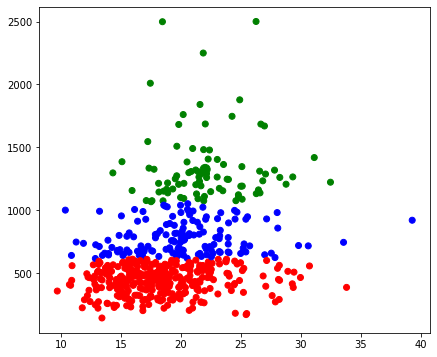

In [0]:
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(df_copy[features[0]], df_copy[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset

In [0]:
# Perform K-Means Clustering on the Dataset

# make lists of categorical and numeric columns
cat_cols = df.columns[df.dtypes=='object']
num_cols = df.columns[df.dtypes!='object']

In [0]:
# What are the cat columns?
cat_cols

Index([], dtype='object')

In [0]:
# how many do we have of each?
print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

0 categorical columns
32 numerical columns


In [0]:
df.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [0]:
df.drop(['Unnamed: 32'], axis=1, inplace=True)

In [0]:
df.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [0]:
# Make a copy of our dataframe, we will standarize the copy so as to not overwrite our original data
df_processed = df.copy()

In [0]:
scaler = StandardScaler()

In [0]:
# Standardize the dataset (default is normalization)
df_processed = scaler.fit_transform(df_processed)

In [0]:
pca = PCA(n_components=10)

In [0]:
# Apply PCA to the data
pca_features = pca.fit_transform(df_processed)

In [0]:
#  how much variation did each principal component explain?
pca.explained_variance_ratio_

array([0.42864701, 0.18376792, 0.09146436, 0.06391475, 0.05318759,
       0.03982815, 0.0315572 , 0.02166945, 0.01486427, 0.01300429])

In [0]:
# How much total variance did we explain?
sum(pca.explained_variance_ratio_)

0.9419049919382733

In [0]:
# How much information did we lose?
1-sum(pca.explained_variance_ratio_)

0.05809500806172674

In [0]:
# MAKE A SKREE SKREE PLOT

# define the number of components
num_components=len(pca.explained_variance_ratio_)
num_components

10

In [0]:
# create a numpy array as long as the number of components
ind = np.arange(num_components) 
ind

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
# create an array of 10 values
vals = pca.explained_variance_ratio_
vals

array([0.42864701, 0.18376792, 0.09146436, 0.06391475, 0.05318759,
       0.03982815, 0.0315572 , 0.02166945, 0.01486427, 0.01300429])

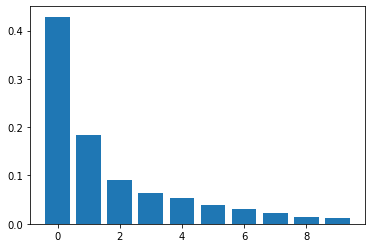

In [0]:
# Plot the variance explained by each component.
ind = np.arange(num_components)
num_components=len(pca.explained_variance_ratio_)
plt.bar(ind, vals);

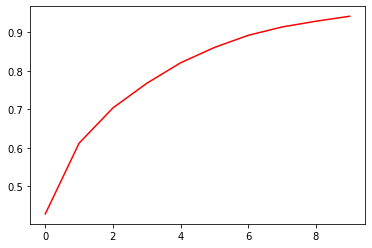

In [0]:
# Plot the cumulative variance explained by all the components.
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_
cumvals = np.cumsum(vals)
plt.plot(ind, cumvals, c='r');

In [0]:
# Define scree plot function
def scree_plot(pca):

    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals, c='r')
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

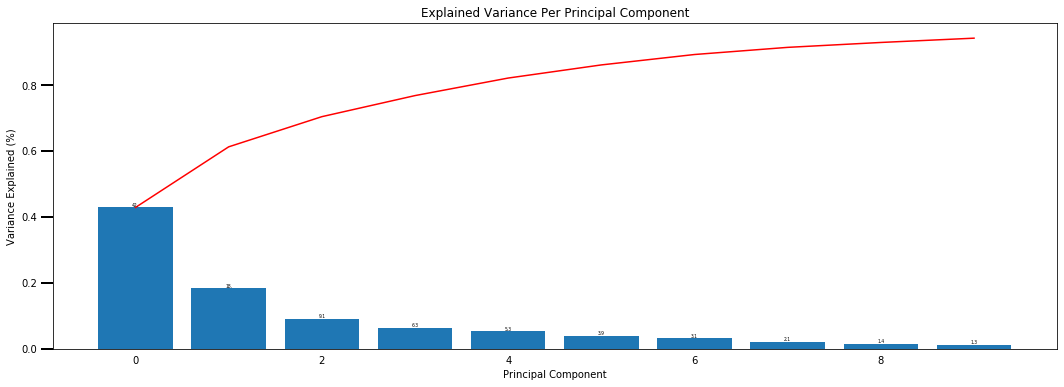

In [0]:
# Apply the plot function to our principle component
scree_plot(pca)

In [0]:
# K-MEANS CLUSTERING

# Instantiate the sklearn class, and pick a number of clusters.
kmeans = KMeans(n_clusters=3)
# fit the instantiate model to our data.
kmeans.fit(df_processed)
# the labels are the same as the 3 centers.
labels = kmeans.labels_
print(labels)

[0 0 0 1 0 1 0 1 1 1 2 1 0 2 1 1 2 1 0 2 2 2 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1
 2 2 1 2 1 0 1 2 0 2 1 2 2 2 2 2 0 2 2 0 1 2 2 2 2 1 2 1 1 2 2 1 2 0 1 1 2
 2 0 2 0 0 2 2 1 0 0 2 0 2 0 2 1 2 2 2 2 1 0 2 2 2 1 2 2 2 2 2 1 2 2 0 2 2
 1 1 2 2 2 2 1 1 2 2 0 0 2 2 2 2 0 1 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 1 1 2
 2 2 2 1 1 2 2 2 0 2 2 2 2 0 0 2 0 2 2 2 0 2 2 2 1 2 2 2 1 1 2 2 0 0 2 2 2
 2 2 2 2 2 1 2 2 1 1 2 1 0 0 1 2 0 0 1 2 2 2 2 1 2 0 2 0 1 1 1 1 2 0 0 2 2
 2 1 2 2 2 2 2 1 1 2 2 0 2 2 0 0 2 0 2 2 1 2 0 2 2 1 2 2 0 2 0 2 0 2 0 1 0
 1 0 2 0 2 0 0 2 2 2 1 2 2 0 2 2 2 2 2 2 2 0 2 0 1 2 2 2 2 1 2 1 2 2 2 2 2
 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 0 2 0 2 2 2 2 1 1 1 2 2
 2 2 0 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 1 0 1 2 2 1 2 2 2 2 2 2 2 2 0 0 2 0 0
 1 2 0 0 2 2 1 2 2 1 2 2 2 1 2 2 2 2 1 0 2 2 1 0 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 1 2 0 0 2 1 2 2 2 2 1 0 2 2
 2 2 0 2 2 0 2 0 2 2 2 2 2 2 2 2 0 0 2 2 2 1 2 2 0 1 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 1 2 0 2 2 2 2 0 

In [0]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)
df['clusters'] = new_series.values
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
features = ['texture_mean', 'area_mean']

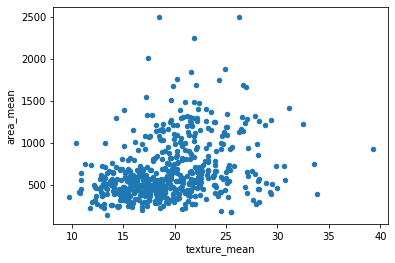

In [0]:
df[features].plot(kind='scatter', x=features[0], y=features[1]);

In [0]:
# Initialize an instance of the KMeans class from sklearn.
k = 3
model = KMeans(n_clusters=k, max_iter=1)

In [0]:
# Fit the instantiated model to our sliced dataframe
model.fit(df[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Assign clusters back to our dataframe
df['cluster'] = model.labels_

In [0]:
# Get our centroids
centroids    =  model.cluster_centers_

In [0]:
# turn them into a dataframe
cc  =  pd.DataFrame(centroids)
cc.head()

,0,1
0,18.287203,443.429379
1,22.031034,1324.919540
2,20.198750,784.296094


In [0]:
# Setup some colors for plotting
base_colors  =  ['r', 'g', 'b']
colors       =  [base_colors[centroid] for centroid in model.labels_]

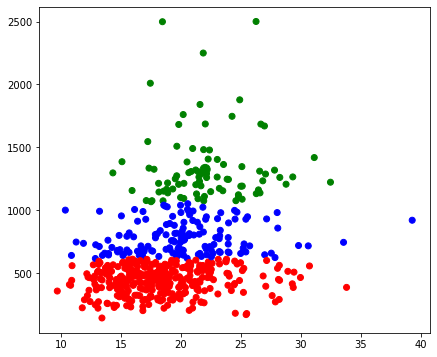

In [0]:
# Plot the scatter of our points with calculated centroids
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(df[features[0]], df[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

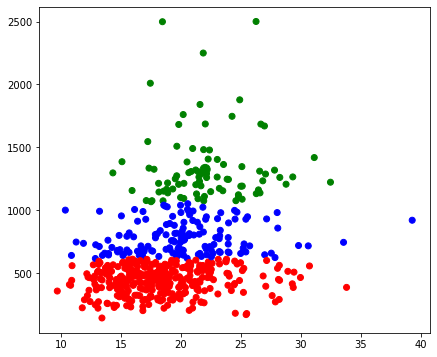

In [0]:
# Clustering Scatterplot on the "raw data"

fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(df[features[0]], df[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

# Hmm, the scatterplots look EXACTLY the same. 
# I must be a k-means and clustering natural.
# 100 % accuracy.

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project

In [0]:
# Okay, I know I need to study more for this Sprint Challenge (I passed). 

# Thank you. I will also attend Office Hours to listen to questions and answers.
# My Data Storytelling project has been starting well; I need to work
# on some more visualizations, replicate experiments for more data to present,
# and build my presentation.

# I got frustrated with this assignment because I got it right the first time
# using standard scaler and PCA first which seems more realistic and applicable for
# the next Unit (2), for Machine Learning which would required standardizing the data,
# and then sometimes PCA to plot the data. Why would I not do this? Why would I want
# to compare if I'm not supposed to not do this? I'd rather not practice doing things
# the wrong way. Perhaps for comparing feature engineering?

# Check out PCA documentation and explained_variance_